In [24]:
%matplotlib inline

In [1]:
import nltk

In [2]:
text = nltk.word_tokenize("And now for something completely different")

In [3]:
text

['And', 'now', 'for', 'something', 'completely', 'different']

In [4]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [7]:
for _, tag in nltk.pos_tag(text):
    nltk.help.upenn_tagset(tag)

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war r

In [9]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")

In [10]:
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [13]:
tag_set = set(tag for _, tag in nltk.pos_tag(text))
for tag in sorted(tag_set):
    nltk.help.upenn_tagset(tag)

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
TO: "to" as preposition or infinitive marker
    to
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postp

In [14]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [15]:
len(text)

1161192

In [16]:
text.similar("woman")

man time day year car moment world house family child country boy
state job place way war girl work word


In [18]:
nltk.corpus.brown.tagged_words()[:10]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

In [19]:
from nltk.corpus import brown

In [20]:
brown_tagged = brown.tagged_words(categories='news', tagset='universal')

In [21]:
brown_tagged[100:110]

[('Allen', 'NOUN'),
 ('Jr.', 'NOUN'),
 ('.', '.'),
 ('``', '.'),
 ('Only', 'ADV'),
 ('a', 'DET'),
 ('relative', 'ADJ'),
 ('handful', 'NOUN'),
 ('of', 'ADP'),
 ('such', 'ADJ')]

In [22]:
tag_fd = nltk.FreqDist(tag for _, tag in brown_tagged)

In [23]:
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

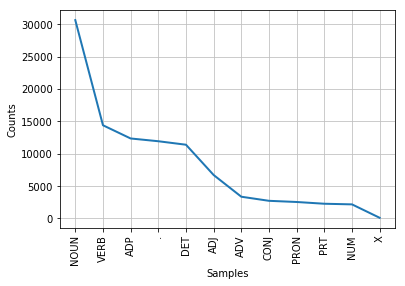

In [27]:
tag_fd.plot()

In [32]:
word_tag_pairs = nltk.bigrams(brown_tagged)

In [33]:
noun_preceders = [a[1] for a, b in word_tag_pairs if b[1] == 'NOUN']

In [34]:
noun_preceders_hist = nltk.FreqDist(noun_preceders)

In [35]:
noun_preceders_hist.most_common()

[('NOUN', 7959),
 ('DET', 7373),
 ('ADJ', 4761),
 ('ADP', 3781),
 ('.', 2796),
 ('VERB', 1842),
 ('CONJ', 938),
 ('NUM', 894),
 ('ADV', 186),
 ('PRT', 94),
 ('PRON', 19),
 ('X', 11)]

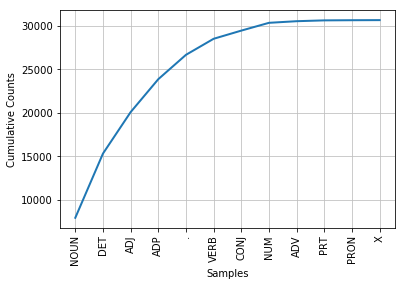

In [36]:
noun_preceders_hist.plot(cumulative=True)

In [37]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')

In [38]:
wsj[:10]

[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET')]

In [39]:
verb_freq = nltk.FreqDist(verb for verb, tag in wsj if tag == 'VERB')

In [41]:
verb_freq.most_common(10)

[('is', 671),
 ('said', 628),
 ('was', 367),
 ('are', 367),
 ('be', 356),
 ('has', 339),
 ('have', 323),
 ('will', 280),
 ('says', 210),
 ('would', 209)]

In [42]:
brown_learned_text = brown.words(categories='learned')

In [43]:
follows_often = set(b for a, b in nltk.bigrams(brown_learned_text) if a == 'often')

In [45]:
print(', '.join(sorted(follows_often)[:20]))

,, ., accomplished, analytically, appear, apt, associated, assuming, became, become, been, began, call, called, carefully, chose, classified, colorful, composed, contain


In [47]:
brown_learned_tags = brown.tagged_words(categories='learned', tagset='universal')

In [49]:
pos_follows_often = [b[1] for a, b in nltk.bigrams(brown_learned_tags) if a[0] == 'often']

In [50]:
nltk.FreqDist(pos_follows_often).tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [55]:
count = 0
for sent in brown.tagged_sents():
    if count >= 25:
        break
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sent):
        if t1.startswith('V') and t2 == 'TO' and t3.startswith('V'):
            count += 1
            print(w1, w2, w3)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet


In [60]:
from nltk.corpus import brown

brown_sents = brown.sents(categories='news')



In [57]:
patterns = [
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'.*ould$', 'MD'),               # modals
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                     # nouns (default)
]

In [58]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [61]:
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [62]:
import nltk

In [69]:
from nltk.tbl import demo

In [71]:
demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  